In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [32]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [33]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:

data.columns




Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [35]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
data = pd.get_dummies(data,drop_first = True)
data.head()
data = data.astype(int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [37]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

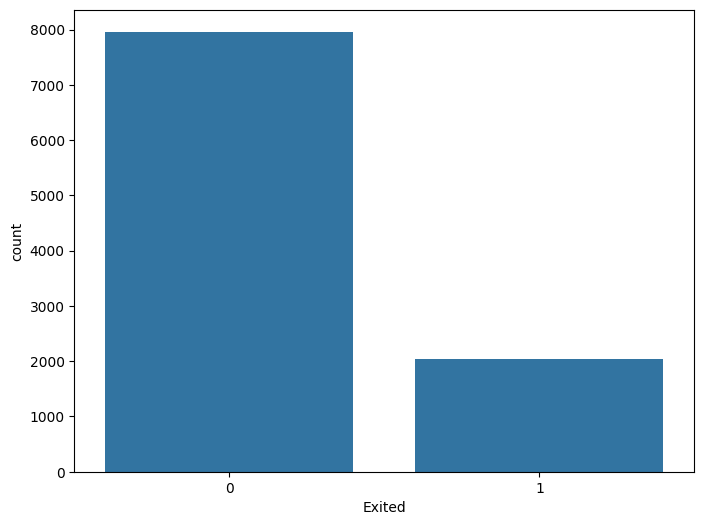

In [38]:
plt.figure(figsize =(8,6))
sns.countplot(x='Exited',data = data)

In [39]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [40]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled


array([[-0.47944328,  0.19687202, -0.00234647, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 1.04580863,  1.33803657,  1.03625698, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-0.85297437, -0.08841912,  1.03625698, ..., -0.5761528 ,
         1.73307782,  0.91105005],
       ...,
       [ 0.86941896, -0.08841912, -1.38715108, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [ 0.16386025,  0.38706611,  1.03625698, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 0.47513615,  1.14784248, -1.38715108, ...,  1.73565068,
        -0.57700814,  0.91105005]], shape=(9000, 11))

In [45]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
print(LR.fit(X_train_scaled, y_train_classified))

LogisticRegression()


In [46]:
y_test_classified = [ 1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled,y_test_classified)
print("Modal Accuracy:",accuracy1)

Modal Accuracy: 0.809


In [47]:
from sklearn import svm
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
svm = svm.SVC()
print(svm.fit(X_train_scaled, y_train_classified))

SVC()


In [48]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = svm.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.865


In [49]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
rf = RandomForestClassifier()
print(rf.fit(X_train_scaled, y_train_classified))

RandomForestClassifier()


In [50]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = rf.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.87


In [51]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
dt = DecisionTreeClassifier()
print(dt.fit(X_train_scaled, y_train_classified))

DecisionTreeClassifier()


In [52]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy4 = dt.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.799


In [53]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
KNN = KNeighborsClassifier()
print(KNN.fit(X_train_scaled, y_train_classified))

KNeighborsClassifier()


In [54]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy5 = KNN.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.84


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
print(GBC.fit(X_train_scaled, y_train_classified))

GradientBoostingClassifier()


In [56]:


y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)


Model Accuracy: 0.867


In [57]:
performance_summary = pd.DataFrame({
    'Model':['LR','svm','KNN','dt','rf','GBC'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3,
           accuracy4,
           accuracy5,
           accuracy6
          ]
})
performance_summary

,Model,ACC
0,LR,0.809
1,svm,0.865
2,KNN,0.870
3,dt,0.799
4,rf,0.840
5,GBC,0.867
